# **Credit Card Fraud Detection with Decision Trees and SVM**

Problem Statement:-
Imagine that you work for a financial institution and part of your job is to build a model that predicts if a credit card transaction is fraudulent or not. You can model the problem as a binary classification problem. A transaction belongs to the positive class (1) if it is a fraud, otherwise it belongs to the negative class (0).

You have access to transactions that occured over a certain period of time. The majority of the transactions are normally legitimate and only a small fraction are non-legitimate. Thus, typically you have access to a dataset that is highly unbalanced. This is also the case of the current dataset: only 492 transactions out of 284,807 are fraudulent (the positive class - the frauds - accounts for 0.172% of all transactions).


# Importing Dataset from Kaggle

In [2]:
import os
os.environ['KAGGLE_USERNAME'] = 'ibrahimahmed05'
os.environ['KAGGLE_KEY'] = '1bfa1b55ce18364f2bc02bb78f531b63'


In [7]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0


In [8]:
!unzip creditcardfraud.zip

Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


# Importing libraries

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.svm import LinearSVC

In [10]:
data= pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Data Preprocessing

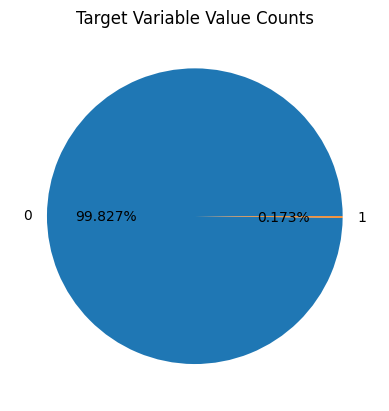

In [13]:
labels = data.Class.unique()
sizes = data.Class.value_counts().values
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.3f%%')
ax.set_title('Target Variable Value Counts')
plt.show()

<Axes: >

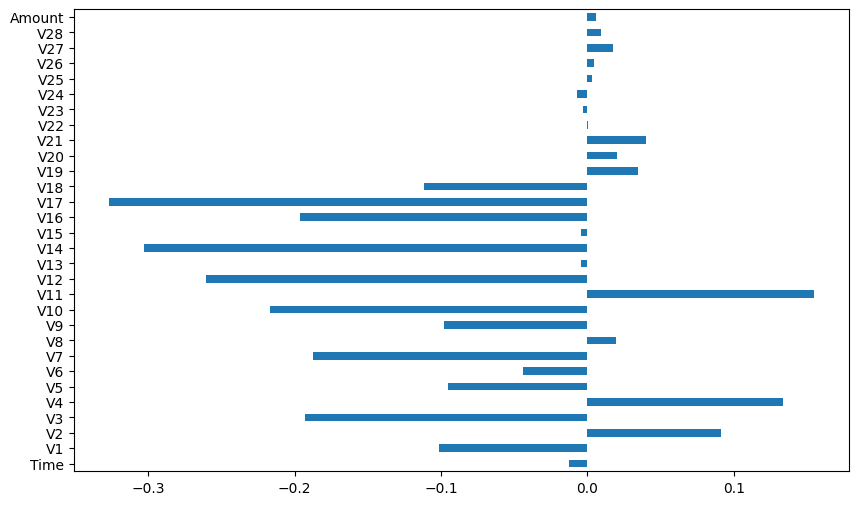

In [15]:
correlation_values = data.corr()['Class'].drop('Class')
correlation_values.plot(kind='barh', figsize=(10, 6))

In [16]:
X= data.drop('Class', axis=1)
y= data['Class']
X= StandardScaler().fit_transform(X)
X = normalize(X, norm="l1")

# Feature Extraction

In [27]:
correlated_values= abs(data.corr()['Class'].drop('Class'))
correlated_values= correlated_values.sort_values(ascending=False)
correlated_cols= correlated_values.head(6).index.tolist()
X= data[correlated_cols]
X.head()

,V17,V14,V12,V10,V16,V3
0,0.207971,-0.311169,-0.617801,0.090794,-0.470401,2.536347
1,-0.114805,-0.143772,1.065235,-0.166974,0.463917,0.166480
2,1.109969,-0.165946,0.066084,0.207643,-2.890083,1.773209
3,-0.684093,-0.287924,0.178228,-0.054952,-1.059647,1.792993
4,-0.237033,-1.119670,0.538196,0.753074,-0.451449,1.548718


# Train Test Split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decission Tree Classifier

In [35]:
w_train = compute_sample_weight('balanced', y_train)
dt = DecisionTreeClassifier(max_depth=4, random_state=35)
dt.fit(X_train, y_train, sample_weight=w_train)
y_pred= dt.predict(X_test)
dt_auc= roc_auc_score(y_test, y_pred)
print(f'AUC Score of decision tree algorithm is: {dt_auc}')

AUC Score of decision tree algorithm is: 0.9269754257921514


In [34]:
svm= LinearSVC(class_weight='balanced', random_state=35)
svm.fit(X_train, y_train)
y_pred= svm.predict(X_test)
svm_auc= roc_auc_score(y_test, y_pred)
print(f'AUC Score of SVM algorithm is: {svm_auc}')

AUC Score of SVM algorithm is: 0.9301496660847794


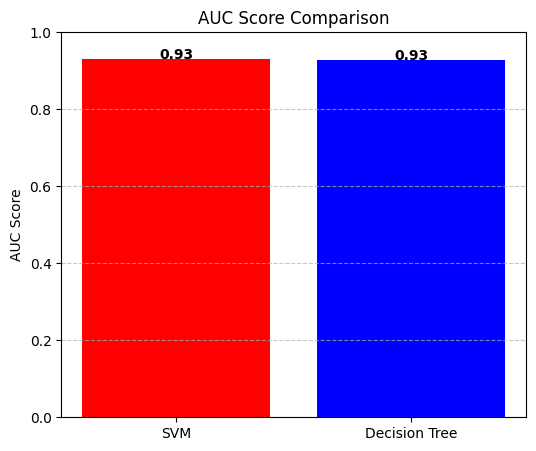

In [40]:
models = ['SVM', 'Decision Tree']
auc_scores = [svm_auc, dt_auc]

plt.figure(figsize=(6,5))
plt.bar(models, auc_scores, color=['red', 'blue'])
plt.title('AUC Score Comparison')
plt.ylabel('AUC Score')
plt.ylim(0, 1)
for i, v in enumerate(auc_scores):
    plt.text(i, v , f'{v:.2f}', ha='center', fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()